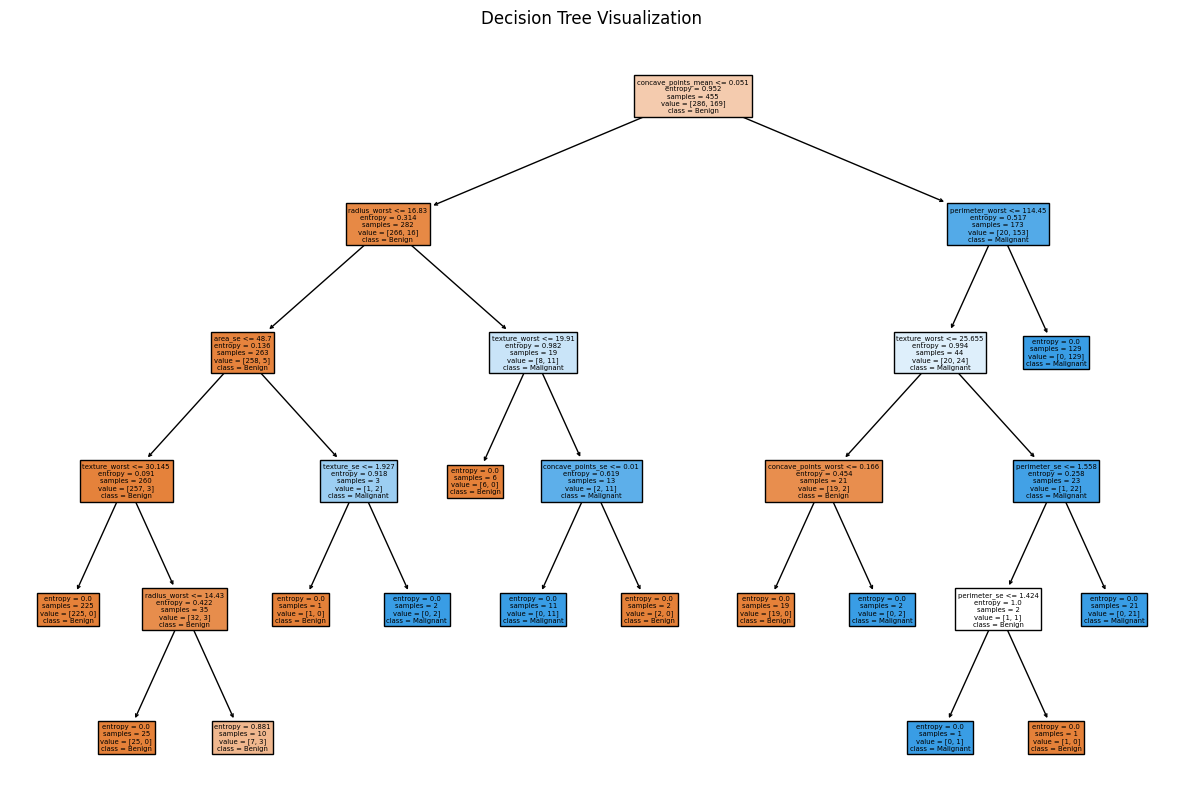

Accuracy: 94.73684210526315
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Prediction: Benign


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv('Datasets/Breast Cancer Dataset.csv')

df = data.drop(['id'], axis=1)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
model.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Benign', 'Malignant'])
plt.title("Decision Tree Visualization")
plt.show()

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("Classification Report:\n", classification_report(y_test, y_pred))

new_sample = pd.DataFrame([[12.5, 19.2, 80.0, 500.0, 0.085, 0.1, 0.05, 0.02, 0.17, 0.06,
                            0.4, 1.0, 2.5, 40.0, 0.006, 0.02, 0.03, 0.01, 0.02, 0.003,
                            16.0, 25.0, 105.0, 900.0, 0.13, 0.25, 0.28, 0.12, 0.29, 0.08]], columns=X.columns)

pred = model.predict(new_sample)
print("Prediction:", "Malignant" if pred[0] == 1 else "Benign")